# Problem Set 1 Solutions

## 18.330 Intro to Numerical Analysis (MIT, Spring 2019) 

Henrik Ronellenfitsch & Boya Song 

### Problem 1. A simple sum (20 points)

#### (a)
We can approximate the value of $S$ by $S_N$ with a very large $N$ (here we choose $N=10^6$), and compute $E_N$ using this approximated value of $S$: 

In [1]:
# install & import PyPlot package for plotting
using PyPlot
PyPlot.svg(true)

true

In [2]:
function S_N(N)
    S_N = 0; 
    for i=1:N
        S_N += 1/float(i)^4
    end
    return S_N
end

S_N (generic function with 1 method)

### S_approximated = S_N(10^6)
S_approximated - S_N(700)

The result above shows that choosing $N\geq700$ should be good enough to ensure that $S_N$ agrees with $S$ to 9-digit precision. 

### Analytical method
We use the fact that
$$
\mathcal{E}_N = S - S_N < \int_N^\infty \frac{1}{x^4} dx = \frac{1}{3} N^{-3}.
$$

The exact sum is $\pi^4/90$ (as one can find out), so we can estimate
$$
\frac{\mathcal{E}_N}{\pi^4/90} < \frac{\frac{1}{3}N^{-3}}{\pi^4/90} \stackrel{!}{<} 10^{-9},
$$

which results in $N\approx 675$, similar to the numerical result.

Even if we don't know the exact sum, we can use an approximation.
For instance, we could use the approximate sum,

In [33]:
S_N(10)

1.0820365834937566

Solving $1/3 N^{-3} < 10^{-9} \cdot 1.0820365834937566$ yields
$N\approx 675$. Even an inaccurate approximation with only 10 summands gives a basically optimal estimate of
the number of summands needed to obtain 9 digits of accuracy!

#### (b) 
$S_N$ is implemented in part (a). 

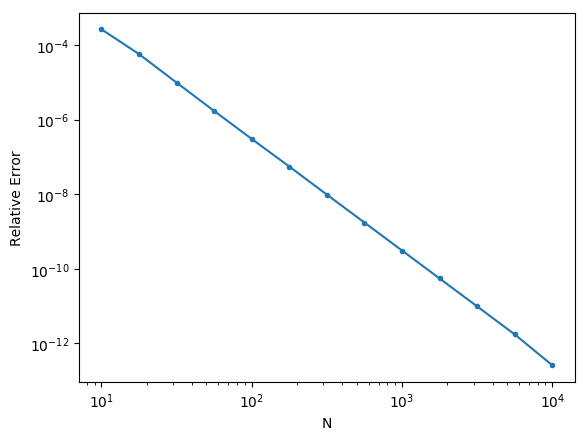

In [9]:
S = π^4/90 # the exact value of the sum
N = 10.0.^(1:0.25:4)

E_N = abs.((S .- S_N.(N))./S) # relative error

# plot
loglog(N, E_N, marker=".");

xlabel("N")
ylabel("Relative Error");

### Problem 2. Another sum (20 points)

#### (a)

In [10]:
function P_N(N)
    summand = pi/N
    S = 0.0
    for i=1:N
        S += summand
    end
    return S 
end

P_N (generic function with 1 method)

We naively expect that $P_N$ is always equal to the exact value, $P_N = \pi$.

#### (b)

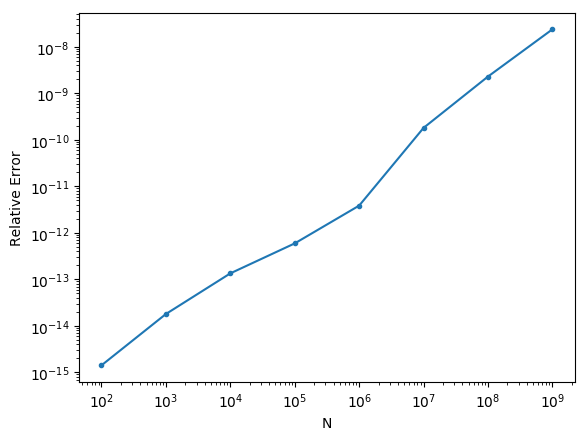

In [14]:
N = 10 .^(2:9);
E_N = abs.(P_N.(N) .- π)./π;
plot(N, E_N, marker=".");
xscale("log"), yscale("log")
xlabel("N"), ylabel("Relative Error");

The plot above shows a roughly linearly relationship between $E_N$ and $N$,
unlike the naive expectation. 

We will see later in the class that this is due to roundoff errors.

### Problem 3. Simpson’s rule (20 points)

#### (a)
$w_n' = \frac{b-a}{2}w_n$

$x'_n = a + \frac{b-a}{2} (x_n+1)$

#### (b)

Solving
$$\begin{align}
P(-1) &= a-b+c = f(-1)\\
P(0) &=  c = f(0)\\
P(1)  &= a+b+c = f(1)
\end{align}$$
yields 
$$\begin{align}
a &= \frac{f(1)-2f(0)+f(-1)}{2}\\
b &= \frac{f(1)-f(-1)}{2}\\
c&= f(0)
\end{align}$$

The integral of $P (x)$ over $[-1,1]$ is: 
$$\int_{-1}^1 P(x) \,d x = \int_{-1}^1 ax^2+bx+c \,d x  = \frac{2}{3}a+2c = \frac{1}{3}f(-1) + \frac{4}{3} f(0) +\frac{1}{3}f(1)$$

As $\int_{-1}^1 P(x) \,d x \approx \int_{-1}^1 f(x) \,d x$, a quadrature rule for $f(x)$ is $w_n = \{\frac{1}{3}, \frac{4}{3}, \frac{1}{3}\}$ with $x_n = \{-1, 0, 1\}$.

#### (c) 
Plugging $w_n, x_n$ into results from (a) we have $w'_n = \{\frac{b-a}{6}, \frac{2 (b-a)}{3}, \frac{b-a}{6}\}$, $x'_n = \{a, \frac{a+b}{2}, b\}$. 

#### (d) 
We need to eveluate all the endpoints and midpoints of the $N$ subintervals. The total number of function evaluations needed is $(N+1)$(number of endpoints)$+N$(number of midpoints)$=2N+1$.  

The composite Simpson's rule is found by adding the contributions from all subintervals.
Define $h=(b-a)/N$ and obtain

$$
\int_a^b f(x)\, dx \approx \frac{b-a}{6}  \left(
f(a) + 4 f(a+\frac{h}{2}) + f(a+ h) + f(a+h) + 4 f(a+\frac{3h}{2}) + \dots
\right)
= \frac{b-a}{6}  \left( f(a) + f(b) + 2\sum_{n=1}^{N-1} f(a+ n h) +  4 \sum_{n=1}^N
f(a + \frac{2n-1}{2}h)
\right)
$$

### Problem 4. Comparing quadrature rules (20 points)


In [15]:
function Newton_Cotes_0(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.0; 
    x=x_min;
    for n=1:N
        I += f(x)*dx;
        x += dx; 
    end
    return I;
end


function Newton_Cotes_1(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.; 
    lx=x_min;   # left point of each subinterval 
    lf = f(lx); 
    for n=1:N
        rx = lx + dx; # right point of each subinterval 
        rf = f(rx); 
        I += (lf + rf)*dx/2.;
        lx = rx;
        lf = rf;
    end

    return I;
end


function Newton_Cotes_2(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.; 
    lx = x_min; # left point of each subinterval 
    lf = f(lx); 
    for n=1:N
        rx = lx + dx;  # right point of each subinterval 
        rf = f(rx); 
        mf = f(lx + dx/2); # midpoint of each subinterval 
        I += (lf + 4*mf + rf)*dx/6.;
        lx = rx;
        lf = rf;
    end
    return I;
end


Newton_Cotes_2 (generic function with 1 method)

#### (a)
The integrand of (a) doesn't have any singularity within the domain of integration, so we can juse use Newton-Cotes quadrature rules directly. 

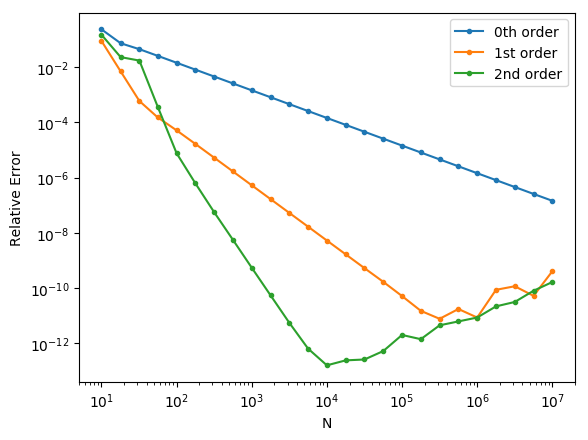

In [26]:
Ia = 2.5193079820307612557;
fa(x) = exp(cos((x+1)^2+2*sin(4*x+1.)));
x_range_a = [0, pi];
N = round.(10 .^(1:0.25:7)); 

Ia_est_order0 = zeros(size(N));
Ia_est_order1 = zeros(size(N));
Ia_est_order2 = zeros(size(N));

for i=1:length(N)
    Ia_est_order0[i] = Newton_Cotes_0(fa, x_range_a, N[i]);
    Ia_est_order1[i] = Newton_Cotes_1(fa, x_range_a, N[i]);
    Ia_est_order2[i] = Newton_Cotes_2(fa, x_range_a, round((N[i]-1)/2));
end
E_N_order0 = abs.(Ia .- Ia_est_order0)./Ia;
E_N_order1 = abs.(Ia .- Ia_est_order1)./Ia;
E_N_order2 = abs.(Ia .- Ia_est_order2)./Ia;

using PyPlot;
l1, = loglog(N, E_N_order0, marker=".");
l2, = loglog(N, E_N_order1, marker=".");
l3, = loglog(N, E_N_order2, marker=".");
legend([l1, l2, l3], ["0th order", "1st order", "2nd order"]);
#xscale("log"), yscale("log");
xlabel("N"), ylabel("Relative Error");

#### (b)
The integrand of (b) doesn't have any singularity within the domain of integration, so we can juse use Newton-Cotes quadrature rules directly. 

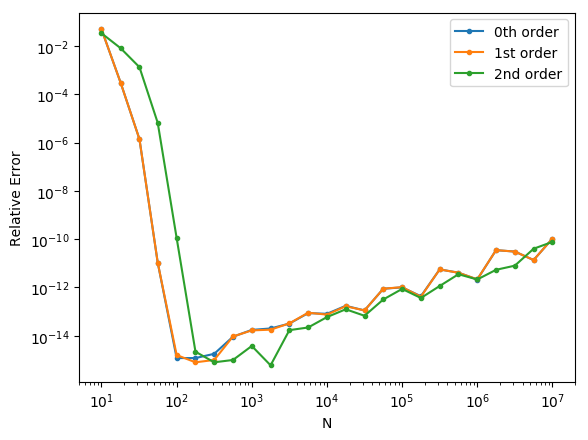

In [25]:
Ib = 4.4889560612699568830;
fb(x) = exp(cos(cos(x+1)^2+2*sin(4*x+1)));
x_range_b = [0, pi];
N = round.(10 .^(1:0.25:7)); 

Ib_est_order0 = zeros(size(N));
Ib_est_order1 = zeros(size(N));
Ib_est_order2 = zeros(size(N));

for i=1:length(N)
    Ib_est_order0[i] = Newton_Cotes_0(fb, x_range_b, N[i]);
    Ib_est_order1[i] = Newton_Cotes_1(fb, x_range_b, N[i]);
    Ib_est_order2[i] = Newton_Cotes_2(fb, x_range_b, round((N[i]-1)/2));
end
E_N_order0 = abs.(Ib .- Ib_est_order0)./Ib;
E_N_order1 = abs.(Ib .- Ib_est_order1)./Ib;
E_N_order2 = abs.(Ib .- Ib_est_order2)./Ib;

using PyPlot;
l1, = loglog(N, E_N_order0, marker=".");
l2, = loglog(N, E_N_order1, marker=".");
l3, = loglog(N, E_N_order2, marker=".");
legend([l1, l2, l3], ["0th order", "1st order", "2nd order"]);
# xscale("log"), yscale("log");
xlabel("N"), ylabel("Relative Error");

#### (c)
The integrand of (c) has a square-root singularity at $x = \pi$, therefore we apply singularity subtraction. In particular, we rewrite $I_c$ as: 
$$
I_c = \int_0^{2\pi} \frac{\tanh x - \tanh \pi}{\sqrt{|x-\pi|}} \, dx + \int_0^{2\pi} \frac{ \tanh \pi}{\sqrt{|x-\pi|}} \, dx
$$

Notice that $I_{c,1}=\int_0^{2\pi} \frac{\tanh x - \tanh \pi}{\sqrt{|x-\pi|}} \, dx$ is not singular, as $\lim\limits_{x\rightarrow0}\frac{\tanh x - \tanh \pi}{\sqrt{|x-\pi|}} =0$ (the series expansion of $\tanh x$ is $x + O(x^3)$). $I_{c, 2} = \int_0^{2\pi} \frac{ \tanh \pi}{\sqrt{|x-\pi|}} \, dx$ is singular at $x=\pi$, but we can integrate it analytically: 

$$
\begin{align}
I_{c,2} &= \tanh \pi \int_0^{2\pi} \frac{ 1}{\sqrt{|x-\pi|}} \, dx\\
&= 2 \tanh \pi \int_0^{\pi} \frac{ 1}{\sqrt{|x|}} \, dx\\
& = 4 \tanh \pi \sqrt{\pi}
\end{align}
$$

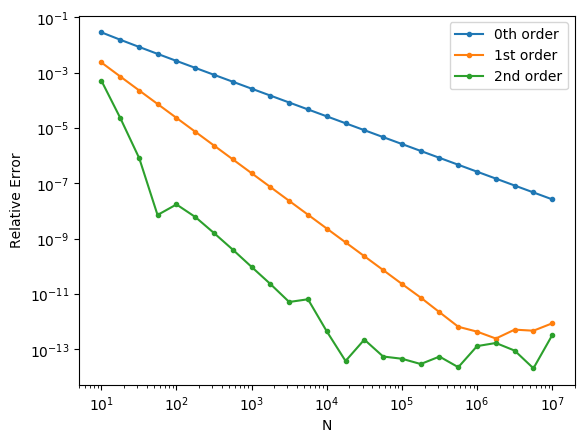

In [24]:
Ic = 6.6388149923287733132;

function fc1(x) 
    # We do not check for equality of floating point numbers
    # to avoid rounding errors
    if abs(x - π)/π < eps()
        return 0;
    else 
        return (tanh(x)-tanh(pi))/sqrt(abs(x-pi));
    end
end

x_range_c = [0, 2*pi];
N = round.(10 .^(1:0.25:7)); 

Ic_est_order0 = zeros(size(N));
Ic_est_order1 = zeros(size(N));
Ic_est_order2 = zeros(size(N));
Ic2 = 4*tanh(pi)*sqrt(pi);

for i=1:length(N)
    Ic_est_order0[i] = Newton_Cotes_0(fc1, x_range_c, N[i])+Ic2;
    Ic_est_order1[i] = Newton_Cotes_1(fc1, x_range_c, N[i])+Ic2;
    Ic_est_order2[i] = Newton_Cotes_2(fc1, x_range_c, round((N[i]-1)/2))+Ic2;
end
E_N_order0 = abs.(Ic .- Ic_est_order0)./Ic;
E_N_order1 = abs.(Ic .- Ic_est_order1)./Ic;
E_N_order2 = abs.(Ic .- Ic_est_order2)./Ic;

using PyPlot;
l1, = plot(N, E_N_order0, marker=".");
l2, = plot(N, E_N_order1, marker=".");
l3, = plot(N, E_N_order2, marker=".");
legend([l1, l2, l3], ["0th order", "1st order", "2nd order"]);
xscale("log"), yscale("log");
xlabel("N"), ylabel("Relative Error");


#### (d)
The range of intergation in (d) is unbounded, therefore we need to use change of variables to apply a Newton-Cotes quadrature rules. Here we will use $x = \frac{u}{1 − u}, dx =\frac{du}{(1-u)^2}, u\in[0, 1]$. 

Additionally
The integrant of (d) has a numerical singularity at $x = 0$ (i.e. $u=0$), which can be computed analyticaly. As the series expansion of $\arctan x = x + O(x^3)$, 
$$\lim_{x\rightarrow0 } \frac{\arctan(\pi x) - \arctan(x) }{x} =\lim_{x\rightarrow0 } \frac{(\pi x-x) +O(x^3) }{x} = \pi-1 $$

Last thing we need to take care of is the value of the integrant when $x=\infty$ (i.e. $u=1$). As the value of $\arctan$ is bounded between $[-\pi/2, \pi/2]$, we have 
$$\lim_{x\rightarrow \infty} \frac{\arctan(\pi x) - \arctan(x) }{x} =0 $$

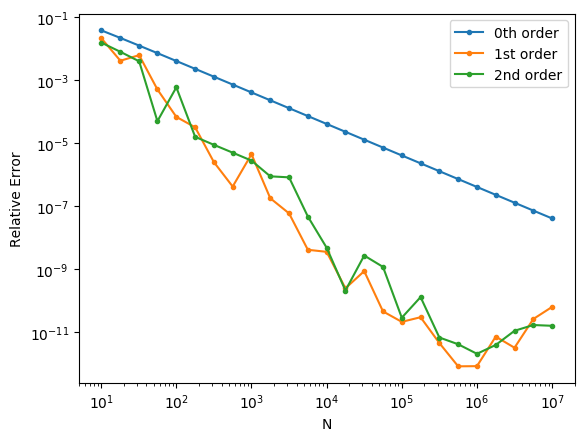

In [27]:
Id = 1.7981374998645790990;

function fd(u)
    if abs(u) < eps()
        return pi - 1;
    elseif abs(u - 1) < eps()
        return 0;
    else
        x = u /(1-u); 
        return (atan(x*pi)-atan(x))/(x*(1-u)^2);
    end
end
u_range_d = [0, 1];
N = round.(10 .^(1:0.25:7)); 


Id_est_order0 = zeros(size(N));
Id_est_order1 = zeros(size(N));
Id_est_order2 = zeros(size(N));

for i=1:length(N)
    Id_est_order0[i] = Newton_Cotes_0(fd, u_range_d, N[i]);
    Id_est_order1[i] = Newton_Cotes_1(fd, u_range_d, N[i]);
    Id_est_order2[i] = Newton_Cotes_2(fd, u_range_d, round((N[i]-1)/2));
end
E_N_order0 = abs.(Id .- Id_est_order0)./Id;
E_N_order1 = abs.(Id .- Id_est_order1)./Id;
E_N_order2 = abs.(Id .- Id_est_order2)./Id;

using PyPlot;
l1, = plot(N, E_N_order0, marker=".");
l2, = plot(N, E_N_order1, marker=".");
l3, = plot(N, E_N_order2, marker=".");
legend([l1, l2, l3], ["0th order", "1st order", "2nd order"]);
xscale("log"), yscale("log");
xlabel("N"), ylabel("Relative Error");


### Problem 5. Simpson’s rule revisited (20 points)


$$
\begin{align}
\int_a^b Q(x) \, dx &= \left[c_0 x + \frac{c_1}{2}x^2 + \frac{c_2}{3}x^3 + \frac{c_3}{4}x^4\right]_a^b \\
&= c_0(b-a) + \frac{c_1}{2}(b^2-a^2)+ \frac{c_2}{3} (b^3-a^3) + \frac{c_3}{4}(b^4-a^4)\\
&= c_0(b-a) + \frac{c_1}{2}(b-a)(b+a) + \frac{c_2}{3} (b-a) \left(a^2+ab+b^2\right) + \frac{c_3}{4}(b-a)\left(a^3+ a^2b + ab^2 + b^3\right)\\
& = \frac{b-a}{6} \left[6c_0 +3c_1a +3c_1b + 2c_2a^2 + 2c_2b^2 + 2c_2ab + \frac{3}{2} c_3 a^3 +  \frac{3}{2} c_3 b^3 + \frac{3}{2} c_3 ab^2 + \frac{3}{2} c_3 a^2b \right]\\
& = \frac{b-a}{6} \left[Q(a)+Q(b) + 4c_0 +2c_1a +2c_1b + c_2a^2 + c_2b^2 + 2c_2ab + \frac{1}{2} c_3 a^3 +  \frac{1}{2} c_3 b^3 + \frac{3}{2} c_3 ab^2 + \frac{3}{2} c_3 a^2b\right]\\
& = \frac{b-a}{6} \left[Q(a)+Q(b) + 4\left(c_0 +c_1\frac{a+b}{2} + c_2\frac{(a+b)^2}{4}  + c_3\frac{(a+b)^3}{8}\right)\right]\\
& = \frac{b-a}{6} \left[Q(a)  + Q(b) + 4 Q\left(\frac{a+b}{2}\right) \right]
\end{align}$$